In [1]:
# https://www.geeksforgeeks.org/how-to-import-kaggle-datasets-directly-into-google-colab/
!pip install opendatasets

In [ ]:
# Credit to this article for a good portion of the ORB detection stuff I used
# https://medium.com/@deepanshut041/introduction-to-orb-oriented-fast-and-rotated-brief-4220e8ec40cf

In [4]:
#!pip install opencv-python
#!pip install pandas
#!pip install matplotlib
import matplotlib.pyplot as plt

import cv2
import numpy as np
import pandas as pd
import os

# Need to choose a dataset:

# Security Cameras, not drones: https://www.kaggle.com/datasets/duythanhng/parking-lot-database-for-yolo
#


[[1218  522]
 [1085  163]
 [ 445  178]
 [ 308  518]
 [1218  522]]


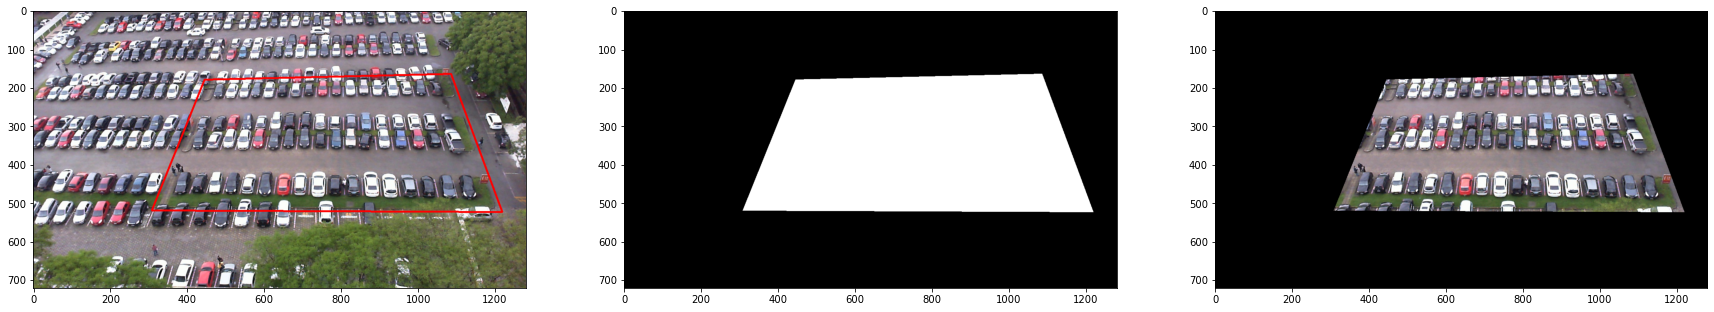

In [10]:
def compute_mask (points, imShape, num_points=4):
    new_ver = np.concatenate((vert, np.array([vert[0]])))
    mask = np.zeros((imShape[0], imShape[1], 3), dtype=np.uint8)
    print(new_ver)
    cv2.fillPoly(mask, pts=[new_ver[0:3]], color=(1, 1, 1))
    cv2.fillPoly(mask, pts=[new_ver[1:4]], color=(1, 1, 1))
    cv2.fillPoly(mask, pts=[new_ver[2:5]], color=(1, 1, 1))   
    return mask


# Hard coded corners for our security image annotated dataset
vert = np.array([[0,0], [0,0], [0,0], [0,0]])
vert[0] = [1218, 522 ];
vert[1] = [ 1085, 163];
vert[2] = [445, 178];
vert[3] = [308, 518 ];


image = cv2.imread("2012-10-26_19_00_03.jpg", cv2.IMREAD_ANYCOLOR)
grid = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
grid_copy = np.copy(grid)

mask = compute_mask(vert, [grid.shape[0], grid.shape[1]])

for i in range(4):
    cv2.line(grid, vert[i],  vert[(i+1)%4], ( 255 ), 3)   

fx, plots = plt.subplots(1, 3, figsize=(30,20))

plots[0].imshow(grid)
plots[1].imshow(mask * 255)
plots[2].imshow(mask *grid_copy)

In [303]:
# PRE: Load the Top-down image which we'll use as the master grid
master_grid = cv2.imread("Master_Grid.png", cv2.IMREAD_ANYCOLOR)
test_segment = cv2.imread("pre_detection_2.jpg", cv2.IMREAD_ANYCOLOR)
test_segment = cv2.cvtColor(test_segment, cv2.COLOR_BGR2RGB)

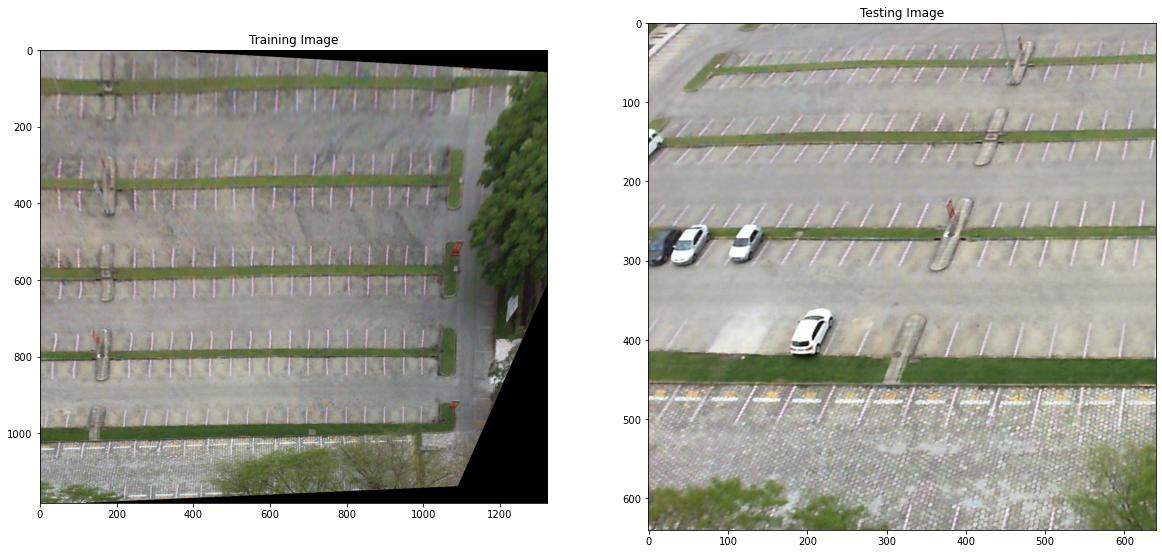

In [304]:
#cv2.imshow("hell", master_grid)
# Convert the training image to RGB
training_image = cv2.cvtColor(master_grid, cv2.COLOR_BGR2RGB)

# Convert the training image to gray scale
training_gray = cv2.cvtColor(training_image, cv2.COLOR_RGB2GRAY)

if False:
    training_gray =cv2.GaussianBlur(training_gray, (19, 19),cv2.BORDER_DEFAULT)

if False:
    training_gray =cv2.GaussianBlur(training_gray, (19, 19),cv2.BORDER_DEFAULT)
    training_gray[training_gray >= 110] = 255
    training_gray[training_gray < 110] = 0

# Create test image by adding Scale Invariance and Rotational Invariance

#test_image = cv2.pyrDown(training_image)
#test_image = cv2.pyrDown(test_image)
#num_rows, num_cols = test_image.shape[:2]

#test_image = np.copy(training_image)
#num_rows, num_cols = test_image.shape[:2]

test_image = test_segment
if False:
    test_image = cv2.pyrUp(test_image)
    
num_rows, num_cols = test_image.shape[:2]

if False:
    rotation_matrix = cv2.getRotationMatrix2D((num_cols/2, num_rows/2), 30, 1)
    test_image = cv2.warpAffine(test_image, rotation_matrix, (num_cols, num_rows))

test_gray = cv2.cvtColor(test_image, cv2.COLOR_RGB2GRAY)
if False:
    test_gray =cv2.GaussianBlur(test_gray, (5, 5),cv2.BORDER_DEFAULT)
# Display traning image and testing image


fx, plots = plt.subplots(1, 2, figsize=(20,10))

plots[0].set_title("Training Image")
plots[0].imshow(training_image)

plots[1].set_title("Testing Image")
plots[1].imshow(test_image)

In [4]:
print((test_image.shape))

(296, 331, 3)


In [56]:
cp = np.copy(training_gray)
cp =cv2.GaussianBlur(cp, (19, 19),cv2.BORDER_DEFAULT)
cp[cp >= 110] = 255
cp[cp < 110] = 0

In [306]:
orb = cv2.ORB_create()
train_keypoints_orb = orb.detect(training_gray, None)
test_keypoints_orb = orb.detect(test_gray, None)

im_with_keypoints = cv2.drawKeypoints(test_gray, test_keypoints_orb, np.array([]), (0,0,255), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
# Show keypoints
cv2.imshow("Keypoints ORB", im_with_keypoints)
cv2.waitKey(0)

27

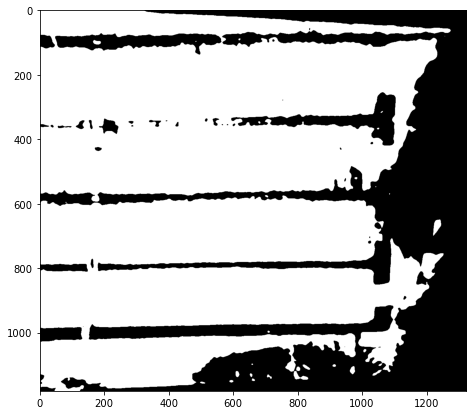

In [227]:
cp = np.copy(training_gray)
cp =cv2.GaussianBlur(cp, (19, 19),cv2.BORDER_DEFAULT)
cp[cp >= 110] = 255
cp[cp < 110] = 0
plt.imshow(cp,  cmap='gray')

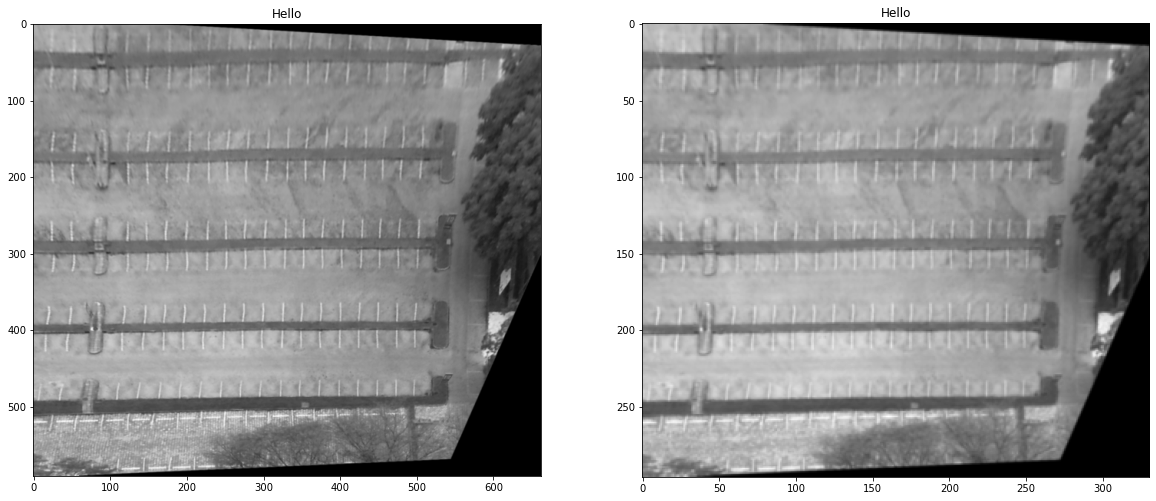

In [311]:


training_gray_d0 = cv2.pyrDown(training_gray)
training_gray_d1 = cv2.pyrDown(training_gray_d0)
test_gray_d0 = cv2.pyrDown(test_gray)
test_gray_d1 = cv2.pyrDown(test_gray_d0)
fx, plots = plt.subplots(1, 2, figsize=(20,10))
plots[0].set_title("Hello")
plots[0].imshow(training_gray_d0[:, :], cmap='gray')
plots[1].set_title("Hello")
plots[1].imshow(training_gray_d1[:, :], cmap='gray')

Found 42 matches for b0
Found 10 matches for b1
Found 6 matches for b2


'\n# Draw detected blobs as red circles.\n# cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS ensures the size of the circle corresponds to the size of blob\nim_with_keypoints = cv2.drawKeypoints(training_gray_d1, train_keypoints, np.array([]), (0,0,255), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)\n# Show keypoints\ncv2.imshow("Keypoints", im_with_keypoints)\ncv2.waitKey(0)\n'

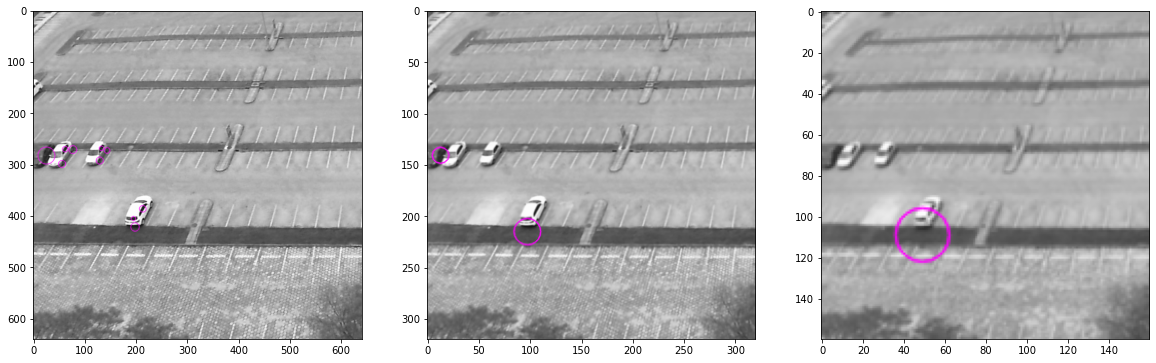

In [318]:
detector = cv2.SimpleBlobDetector()
  
# Initializing parameter setting using cv2.SimpleBlobDetector function
params = cv2.SimpleBlobDetector_Params()

# thresholds
params.minThreshold = 10
params.maxThreshold = 100
#params.thresholdStep = 20
 
# Filter by area (value for area here defines the pixel value)
params.filterByArea = True

params.minArea = 30
 
# Filter by circularity
params.filterByCircularity = False
params.minCircularity = .785
 
# Filter by convexity
params.filterByConvexity = False
params.minConvexity = 0.1
     
# Filter by inertia ratio
params.filterByInertia = False
params.minInertiaRatio = 0.1
 
# Creating a blob detector using the defined parameters
detector = cv2.SimpleBlobDetector_create(params)

blurred_train = cv2.GaussianBlur(training_gray, (5,5),cv2.BORDER_DEFAULT)
blurred_train_d0 =cv2.GaussianBlur(training_gray_d0, (5,5),cv2.BORDER_DEFAULT)
blurred_train_d1 = cv2.GaussianBlur(training_gray_d1, (5,5),cv2.BORDER_DEFAULT)

blurred_test = cv2.GaussianBlur(test_gray, (5,5), cv2.BORDER_DEFAULT)
blurred_test_d0 = cv2.GaussianBlur(test_gray_d0, (5,5), cv2.BORDER_DEFAULT)
blurred_test_d1 = cv2.GaussianBlur(test_gray_d1, (5,5), cv2.BORDER_DEFAULT)

# Detecting the blobs in the image
keypoints_train_b0 = detector.detect(blurred_train)
keypoints_train_b1 = detector.detect(blurred_train_d0)
keypoints_train_b2 = detector.detect(blurred_train_d1)

keypoints_test_blob = detector.detect(blurred_test)
keypoints_test_blob_1 = detector.detect(blurred_test_d0)
keypoints_test_blob_2 = detector.detect(blurred_test_d1)

'''
NOTE: Normaliziation does NOT occur until after matching is completed for blob matching

def normalize_point(keypoint, pyrOctave):
    scale_factor = pyrOctave * 2
    tup = keypoint.pt
    keypoint.pt = tuple([tup[0] * scale_factor, tup[1] * scale_factor])
    keypoint.size *= scale_factor 
    keypoint.octave = pyrOctave
'''
def set_octave(keypoint, pyrOctave):
    keypoint.octave = pyrOctave

#train_keypoints = list(train_keypoints)
train_keypoints_b0 = list()
print("Found " + str(len(keypoints_train_b0)) + " matches for b0")
for i in range(0, len(keypoints_train_b0)):
    train_keypoints_b0.insert(i, keypoints_train_b0[i])
train_keypoints_b0 = tuple(train_keypoints_b0)

    
train_keypoints_b1 = list()
print("Found " + str(len(keypoints_train_b1)) + " matches for b1")
for i in range(0, len(keypoints_train_b1)):
  #  normalize_point(keypoints_train_1[i], 1)
    set_octave(keypoints_train_b1[i], 1)
    train_keypoints_b1.insert(i, keypoints_train_b1[i])
train_keypoints_b1 = tuple(train_keypoints_b1)


train_keypoints_b2 = list()
print("Found " + str(len(keypoints_train_b2)) + " matches for b2")
for i in range(0, len(keypoints_train_b2)):
   # normalize_point(keypoints_train_2[i], 2)
    set_octave(keypoints_train_b2[i], 2)
    train_keypoints_b2.insert(i, keypoints_train_b2[i])
train_keypoints_b2 = tuple(train_keypoints_b2)


test_keypoints_b = list()
for j in range(0, len(keypoints_test_blob)):
    test_keypoints_b.insert(j, keypoints_test_blob[j])
test_keypoints_b = tuple(test_keypoints_b)

test_keypoints_b1 = list()
for j in range(0, len(keypoints_test_blob_1)):
    test_keypoints_b1.insert(j, keypoints_test_blob_1[j])
test_keypoints_b1 = tuple(test_keypoints_b1)

test_keypoints_b2 = list()
for j in range(0, len(keypoints_test_blob_2)):
    test_keypoints_b2.insert(j, keypoints_test_blob_2[j])
test_keypoints_b2 = tuple(test_keypoints_b2)


fx, plots = plt.subplots(1, 3, figsize=(20,20))
#im_with_keypoints_b0 = cv2.drawKeypoints(training_gray, train_keypoints_b0, np.array([]), (0,0,255), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
#im_with_keypoints_b1 = cv2.drawKeypoints(training_gray_d0, train_keypoints_b1, np.array([]), (0,0,255), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
#im_with_keypoints_b2 = cv2.drawKeypoints(training_gray_d1, train_keypoints_b2, np.array([]), (0,0,255), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
im_with_keypoints_b0 = cv2.drawKeypoints(test_gray, test_keypoints_b, np.array([]), (255,0,255), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
im_with_keypoints_b1 = cv2.drawKeypoints(test_gray_d0, test_keypoints_b1, np.array([]), (255,0,255), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
im_with_keypoints_b2 = cv2.drawKeypoints(test_gray_d1, test_keypoints_b2, np.array([]), (255,0,255), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)


plots[0].imshow(im_with_keypoints_b0)
plots[1].imshow(im_with_keypoints_b1)
plots[2].imshow(im_with_keypoints_b2)

'''
# Draw detected blobs as red circles.
# cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS ensures the size of the circle corresponds to the size of blob
im_with_keypoints = cv2.drawKeypoints(training_gray_d1, train_keypoints, np.array([]), (0,0,255), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
# Show keypoints
cv2.imshow("Keypoints", im_with_keypoints)
cv2.waitKey(0)
'''

Number of Keypoints Detected In The Training Image:  500
Number of Keypoints Detected In The Query Image:  500


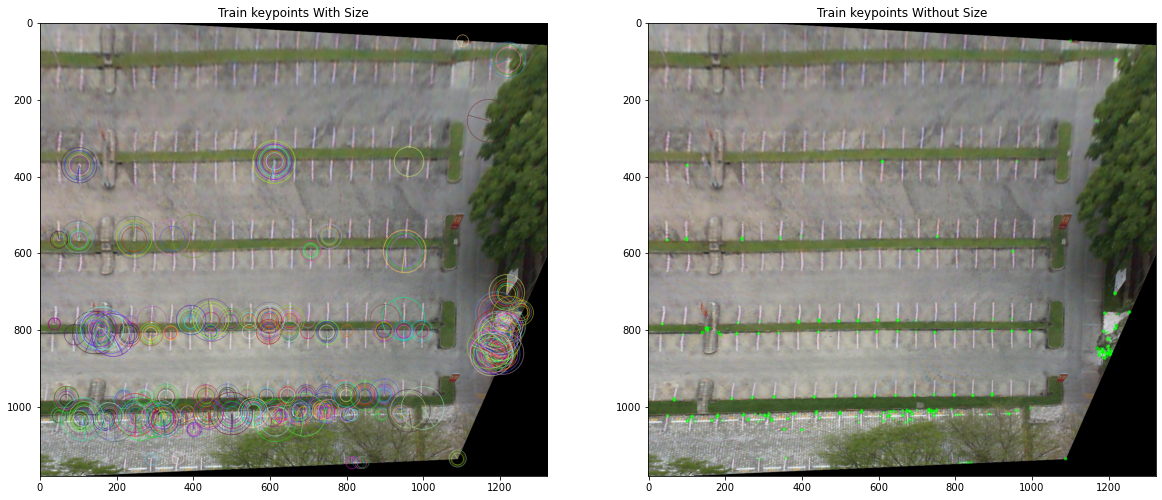

In [319]:
orb = cv2.ORB_create()

train_keypoints, train_descriptor = orb.compute(training_gray, train_keypoints_orb)
test_keypoints, test_descriptor = orb.compute(test_gray, test_keypoints_orb)

keypoints_without_size = np.copy(training_image)
keypoints_with_size = np.copy(training_image)

cv2.drawKeypoints(training_image, train_keypoints, keypoints_without_size, color = (0, 255, 0))

cv2.drawKeypoints(training_image, train_keypoints, keypoints_with_size, flags = cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# Display image with and without keypoints size
fx, plots = plt.subplots(1, 2, figsize=(20,10))

plots[0].set_title("Train keypoints With Size")
plots[0].imshow(keypoints_with_size, cmap='gray')

plots[1].set_title("Train keypoints Without Size")
plots[1].imshow(keypoints_without_size, cmap='gray')

# Print the number of keypoints detected in the training image
print("Number of Keypoints Detected In The Training Image: ", len(train_keypoints))

# Print the number of keypoints detected in the query image
print("Number of Keypoints Detected In The Query Image: ", len(test_keypoints))

In [320]:
orb_blob = cv2.ORB_create()

train_keypoints_b0, train_descriptor_b0 = orb.compute(training_gray, train_keypoints_b0)
train_keypoints_b1, train_descriptor_b1 = orb.compute(training_gray_d0, train_keypoints_b1)
train_keypoints_b2, train_descriptor_b2 = orb.compute(training_gray_d1, train_keypoints_b2)

train_keypoints_blobs = tuple(list(train_keypoints_b0) + list(train_keypoints_b1) + list(train_keypoints_b2))
train_keypoints_blobs = train_keypoints_b0 + train_keypoints_b1 + train_keypoints_b2

train_keypoints_blobs, train_descriptor_blobs = orb.compute(training_gray, train_keypoints_blobs)

test_keypoints_b, test_descriptor_b = orb.compute(test_gray, test_keypoints_b)

In [321]:
print(train_keypoints_orb[150].octave)
print(train_keypoints_b0[0].octave)

b0 = list(train_keypoints_b0)
b1 =  list(train_keypoints_b1)
b2 = list(train_keypoints_b2)
b = b0 + b1 + b2
print(tuple(b))



1
0
(< cv2.KeyPoint 000001FE56BE20C0>, < cv2.KeyPoint 000001FE152E10C0>, < cv2.KeyPoint 000001FE152F5DB0>, < cv2.KeyPoint 000001FE152DBF90>, < cv2.KeyPoint 000001FE152DBE10>, < cv2.KeyPoint 000001FE152DBE40>, < cv2.KeyPoint 000001FEAEB02ED0>, < cv2.KeyPoint 000001FE152EC180>, < cv2.KeyPoint 000001FE152EC150>, < cv2.KeyPoint 000001FE152EC120>, < cv2.KeyPoint 000001FE20FF5480>, < cv2.KeyPoint 000001FE20FFA060>, < cv2.KeyPoint 000001FEA75781B0>, < cv2.KeyPoint 000001FEA7578240>, < cv2.KeyPoint 000001FEABF6EF30>, < cv2.KeyPoint 000001FEABF5FAB0>, < cv2.KeyPoint 000001FEABF5FB40>, < cv2.KeyPoint 000001FEABF5F750>, < cv2.KeyPoint 000001FEABF5FA50>, < cv2.KeyPoint 000001FE0F2A6090>, < cv2.KeyPoint 000001FE153038A0>, < cv2.KeyPoint 000001FE152FC540>, < cv2.KeyPoint 000001FE152FCC90>, < cv2.KeyPoint 000001FE152FCD80>, < cv2.KeyPoint 000001FE15317ED0>, < cv2.KeyPoint 000001FE153173C0>, < cv2.KeyPoint 000001FE15317810>, < cv2.KeyPoint 000001FE15317D80>, < cv2.KeyPoint 000001FE1531C0F0>, < cv2.Key

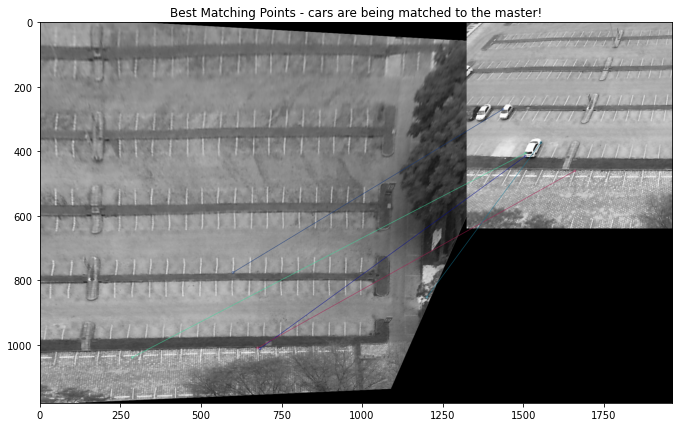


Number of Matching Keypoints Between The Training and Query Images:  131


In [322]:
# Create a Brute Force Matcher object.
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck = True)

# Perform the matching between the ORB descriptors of the training image and the test image
matches = bf.match(train_descriptor, test_descriptor)

bf = cv2.BFMatcher()
matches_b0 = bf.match(train_descriptor_b0, test_descriptor_b)
bf = cv2.BFMatcher(cv2.NORM_HAMMING)
matches_b1 = bf.match(train_descriptor_b1, test_descriptor_b)
bf = cv2.BFMatcher(cv2.NORM_HAMMING)
matches_b2 = bf.match(train_descriptor_b2, test_descriptor_b)

bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck = True)
matches_blobs = bf.match(train_descriptor_blobs, test_descriptor_b)


# The matches with shorter distance are the ones we want.

matches = sorted(matches, key = lambda x : x.distance)
matches_blobs = sorted(matches_blobs, key = lambda x : x.distance)
result = cv2.drawMatches(training_gray, train_keypoints_orb, test_gray, test_keypoints_orb, matches_blobs, test_gray, flags = 2)

# Display the best matching points
plt.rcParams['figure.figsize'] = [14.0, 7.0]
plt.title('Best Matching Points - cars are being matched to the master!')
plt.imshow(result)
plt.show()

# Print total number of matching points between the training and query images
print("\nNumber of Matching Keypoints Between The Training and Query Images: ", len(matches))

In [ ]:
# Step 1: Crop the Top-down image to 1/4 the size, then upscale the image so that it has the same resolution as the original master grid image
#     (we are basically simulating that the drone is closer to the ground and is taking a picture top-down of the parking lot, hence it will only see a smaller section of the master grid)


In [ ]:
# Step 2: Compute feature points of the Master Grid AND the Cropped

In [19]:
# Step 3: Find correspondences between the two images
print(matches[0].queryIdx)
train_keypoints[matches[0].queryIdx].pt
test_keypoints


328


(< cv2.KeyPoint 000001FE14937600>,
 < cv2.KeyPoint 000001FE14937F30>,
 < cv2.KeyPoint 000001FE14949D20>,
 < cv2.KeyPoint 000001FE14949D50>,
 < cv2.KeyPoint 000001FE14949D80>,
 < cv2.KeyPoint 000001FE14949DB0>,
 < cv2.KeyPoint 000001FE14949DE0>,
 < cv2.KeyPoint 000001FE14949E10>,
 < cv2.KeyPoint 000001FE14949E40>,
 < cv2.KeyPoint 000001FE14949E70>,
 < cv2.KeyPoint 000001FE14949EA0>,
 < cv2.KeyPoint 000001FE14949ED0>,
 < cv2.KeyPoint 000001FE14949F00>,
 < cv2.KeyPoint 000001FE14949F30>,
 < cv2.KeyPoint 000001FE14949F60>,
 < cv2.KeyPoint 000001FE14949F90>,
 < cv2.KeyPoint 000001FE14949FC0>,
 < cv2.KeyPoint 000001FE1494A030>,
 < cv2.KeyPoint 000001FE1494A060>,
 < cv2.KeyPoint 000001FE1494A090>,
 < cv2.KeyPoint 000001FE1494A0C0>,
 < cv2.KeyPoint 000001FE1494A0F0>,
 < cv2.KeyPoint 000001FE1494A120>,
 < cv2.KeyPoint 000001FE1494A150>,
 < cv2.KeyPoint 000001FE1494A180>,
 < cv2.KeyPoint 000001FE1494A1B0>,
 < cv2.KeyPoint 000001FE1494A1E0>,
 < cv2.KeyPoint 000001FE1494A210>,
 < cv2.KeyPoint 0000

In [325]:
# Step 4: Compute homography to get the Cropped onto the same scale as the Master Grid

# We will include all the matches as we will run RANSAC on the homography
num_matches_to_include = len(matches)
srcPts = np.zeros((len(matches),2))
dstPts = np.zeros((len(matches), 2))
for i in range(0, num_matches_to_include):
    srcPts[i, :] = test_keypoints[matches[i].trainIdx].pt
    dstPts[i, :] = train_keypoints[matches[i].queryIdx].pt


_srcPts = np.float32(srcPts[:, np.newaxis, :])
_srcDst = np.float32(dstPts[:, np.newaxis, :])

h, status = cv2.findHomography(_srcPts, _srcDst, cv2.RANSAC, 9.9)


print(h)

[[ 2.16567664e+00  8.94722805e-01 -8.30188129e+02]
 [ 1.57829008e-01  3.03228860e+00  2.83882291e+02]
 [ 2.22282855e-04  1.35363179e-03  1.00000000e+00]]


Text(0.5, 1.0, 'Homography overlaid over original')

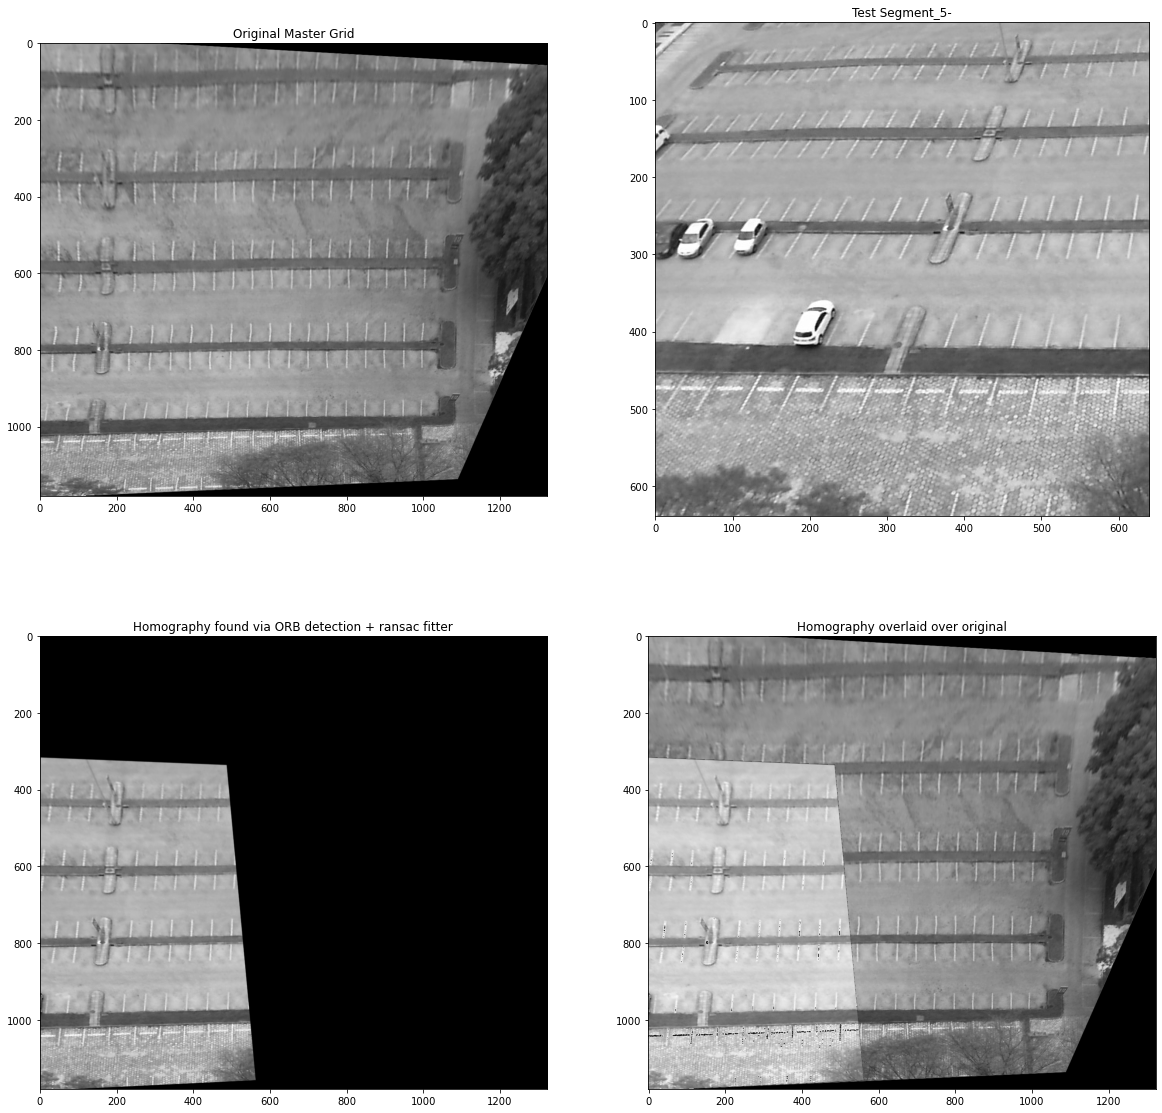

In [326]:
dst = cv2.warpPerspective(test_gray, h, (training_gray.shape[1], training_gray.shape[0])) #wraped image

overlay = np.copy(training_gray)

where_true = dst >0

overlay -=  (overlay * where_true)
for i in range(1, 30):
    overlay += where_true
    
overlay += dst 

fx, plots = plt.subplots(2, 2, figsize=(20,20))
plots[0,0].imshow(training_gray, cmap = 'gray')
plots[0,0].set_title("Original Master Grid")
plots[0,1].imshow(test_gray, cmap = 'gray')
plots[0,1].set_title("Test Segment_5-")
plots[1,0].imshow(dst, cmap='gray')
plots[1,0].set_title("Homography found via ORB detection + ransac fitter")
plots[1,1].imshow(overlay, cmap = 'gray')
plots[1,1].set_title("Homography overlaid over original")


In [ ]:
# Step 5: Visually overlay the Cropped image onto the Master Grid
#    Once this step is done, any space occupancy that is computed on the Cropped image will now be aligned with the master grid
#       -> We will be able to easily correspond the occupied space with the master grid (using a euclidean distance min b/w the Cropped's detected parking space's centroid
#             and all Master Grid's parking centroids)
cv2.Point2f

In [329]:
 ------------------------------------------------------------------------------------
 START ACTUAL FUNCTIONS!! ------------------------------------------------------------------------------------
   Everything above this was basically just playing around & research+developing
    Everything below is real working stuff!

SyntaxError: invalid syntax (66669469.py, line 1)

In [205]:
import matplotlib.pyplot as plt

import cv2
import numpy as np
import pandas as pd
import os

In [252]:
def MatchImageSegmentToMasterGrid(masterGrid, imgSegment):
    training_image = cv2.cvtColor(master_grid, cv2.COLOR_BGR2RGB)

    # Convert the training image to gray scale
    training_gray = cv2.cvtColor(training_image, cv2.COLOR_RGB2GRAY)
    
    if False:
        training_gray =cv2.GaussianBlur(training_gray, (19, 19),cv2.BORDER_DEFAULT)

    if False:
        training_gray =cv2.GaussianBlur(training_gray, (19, 19),cv2.BORDER_DEFAULT)
        training_gray[training_gray >= 110] = 255
        training_gray[training_gray < 110] = 0

    # Create test image by adding Scale Invariance and Rotational Invariance

    #test_image = cv2.pyrDown(training_image)
    #test_image = cv2.pyrDown(test_image)
    #num_rows, num_cols = test_image.shape[:2]

    #test_image = np.copy(training_image)
    #num_rows, num_cols = test_image.shape[:2]

    test_image = imgSegment
    if False:
        test_image = cv2.pyrUp(test_image)

    num_rows, num_cols = test_image.shape[:2]

    if False:
        rotation_matrix = cv2.getRotationMatrix2D((num_cols/2, num_rows/2), 30, 1)
        test_image = cv2.warpAffine(test_image, rotation_matrix, (num_cols, num_rows))

    test_gray = cv2.cvtColor(test_image, cv2.COLOR_RGB2GRAY)
    if False:
        test_gray =cv2.GaussianBlur(test_gray, (5, 5),cv2.BORDER_DEFAULT)
    # Display traning image and testing image

# ------------------------------------------------------------------------
# ------------------------------------------------------------------------
    orb = cv2.ORB_create()
    train_keypoints_orb = orb.detect(training_gray, None)
    test_keypoints_orb = orb.detect(test_gray, None)
    
# ------------------------------------------------------------------
    orb = cv2.ORB_create()

    train_keypoints, train_descriptor = orb.compute(training_gray, train_keypoints_orb)
    test_keypoints, test_descriptor = orb.compute(test_gray, test_keypoints_orb)

    keypoints_without_size = np.copy(training_image)
    keypoints_with_size = np.copy(training_image)

# -----------------------------------------------------------------------------
    bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck = True)

    # Perform the matching between the ORB descriptors of the training image and the test image
    matches = bf.match(train_descriptor, test_descriptor)

    # The matches with shorter distance are the ones we want.
    matches = sorted(matches, key = lambda x : x.distance)

# -----------------------------------------------------------------------------------
    num_matches_to_include = len(matches)
    srcPts = np.zeros((len(matches),2))
    dstPts = np.zeros((len(matches), 2))
    for i in range(0, num_matches_to_include):
        srcPts[i, :] = test_keypoints[matches[i].trainIdx].pt
        dstPts[i, :] = train_keypoints[matches[i].queryIdx].pt


    _srcPts = np.float32(srcPts[:, np.newaxis, :])
    _srcDst = np.float32(dstPts[:, np.newaxis, :])

    h, status = cv2.findHomography(_srcPts, _srcDst, cv2.RANSAC, 9.9)

    return h


In [253]:
# Overlays the homograph-ied image ono the master grid
def OverlayWarpedSegmentOverMaster(warpedImg, masterImg):
    # Make the master img gray, but make the warpedImg colored.
    master_gray = cv2.cvtColor(masterImg, cv2.COLOR_RGB2GRAY)
    
    where_true = warpedImg > 0
    where_true = np.bitwise_and(np.bitwise_and(where_true[:, :, 0], where_true[:, :, 1]), where_true[:, :, 2])
    master_gray -= master_gray * where_true
    
    master_gray = cv2.cvtColor(master_gray, cv2.COLOR_GRAY2RGB)
    master_gray += warpedImg
    
    return master_gray



In [254]:
# Transforms the points in CSV form (computed via YOLO from ANY perspective view), to the top-down master parking lot
#    NOTE: 
def TransformCentroidPoints(points, H):
    k = np.zeros(points.shape, dtype='int')
    for i in range(0,points.shape[0]):
        k[i, :] = Transform2DPoint(points[i, :], H)

    return k

In [255]:
def Transform2DPoint(point, H):
    pt = np.array([point[0], point[1], 1])
    pt_ = np .matmul(H, pt)
    return [int(pt_[0] / pt_[2]), int(pt_[1] / pt_[2]) ]

In [256]:
master_grid = cv2.imread("Master_Grid.png", cv2.IMREAD_ANYCOLOR)
master_grid = cv2.cvtColor(master_grid, cv2.COLOR_BGR2RGB)

test_segment_0 = cv2.imread("pre_detection_0.jpg", cv2.IMREAD_ANYCOLOR)
test_segment_0 = cv2.cvtColor(test_segment_0, cv2.COLOR_BGR2RGB)
H_0 = MatchImageSegmentToMasterGrid(master_grid, test_segment_0)

test_segment_1 = cv2.imread("pre_detection_1.jpg", cv2.IMREAD_ANYCOLOR)
test_segment_1 = cv2.cvtColor(test_segment_1, cv2.COLOR_BGR2RGB)
H_1 = MatchImageSegmentToMasterGrid(master_grid, test_segment_1)

test_segment_2 = cv2.imread("pre_detection_2.jpg", cv2.IMREAD_ANYCOLOR)
test_segment_2 = cv2.cvtColor(test_segment_2, cv2.COLOR_BGR2RGB)
H_2 = MatchImageSegmentToMasterGrid(master_grid, test_segment_2)


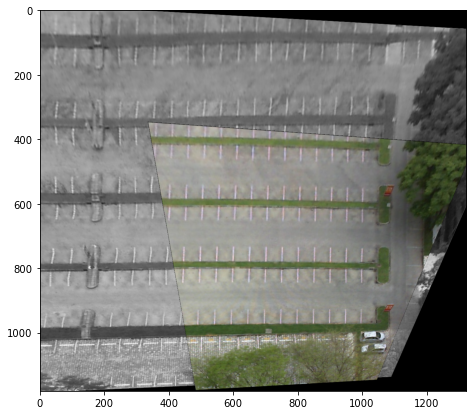

In [324]:
# For visualization purposes, show the overlaid segment for understanding of accuracy of homography
dst_0 = cv2.warpPerspective(test_segment_0, H_0, (training_gray.shape[1], training_gray.shape[0])) #wraped image
dst_1 = cv2.warpPerspective(test_segment_1, H_1, (training_gray.shape[1], training_gray.shape[0])) #wraped image
dst_2 = cv2.warpPerspective(test_segment_2, H_2, (training_gray.shape[1], training_gray.shape[0])) #wraped image

overlaid_0 = OverlayWarpedSegmentOverMaster(dst_0, master_grid)
overlaid_1 = OverlayWarpedSegmentOverMaster(dst_1, master_grid)
overlaid_2 = OverlayWarpedSegmentOverMaster(dst_2, master_grid)

#plt.imshow(dst_0)
plt.imshow(overlaid_0)

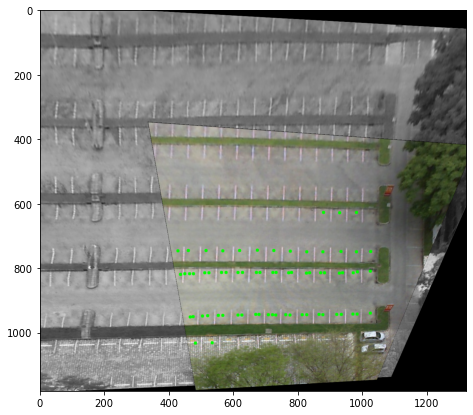

In [258]:
centroids_0_pre =  np.array(pd.read_csv('image_centroids_0.csv'))[:, 1:3]
centroids_0_post = TransformCentroidPoints(centroids_0_pre, H_0)

_overlaid_0 = np.copy(overlaid_0)
for i in range(0, centroids_0_post.shape[0]):
    tup = (centroids_0_post[i, 1], centroids_0_post[i, 0])
    cv2.circle(_overlaid_0,(centroids_0_post[i, 0], centroids_0_post[i, 1]), 5, (0,255,0), -1)
plt.imshow(_overlaid_0)


_overlaid_1 = np.copy(overlaid_1)
centroids_1_pre = np.array(pd.read_csv('image_centroids_1.csv'))[:, 1:3]
centroids_1_post = TransformCentroidPoints(centroids_1_pre, H_1)
for i in range(0, centroids_1_post.shape[0]):
    tup = (centroids_1_post[i, 1], centroids_1_post[i, 0])
    cv2.circle(_overlaid_1,(centroids_1_post[i, 0], centroids_1_post[i, 1]), 5, (0,255,0), -1)
    



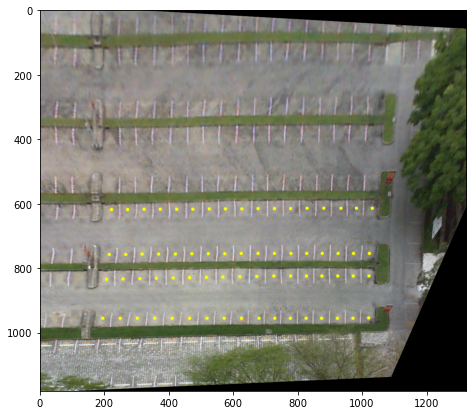

In [259]:
centroids_ground_truth =  np.array(pd.read_csv('master_ground_truth_centroids.csv'), dtype='int')
_master = np.copy(master_grid)
for i in range(0, centroids_ground_truth.shape[0]):
    tup = (centroids_ground_truth[i, 0], centroids_ground_truth[i, 1])
    cv2.circle(_master,(tup[0], tup[1]), 5, (255,255,0), -1)
plt.imshow(_master)

640


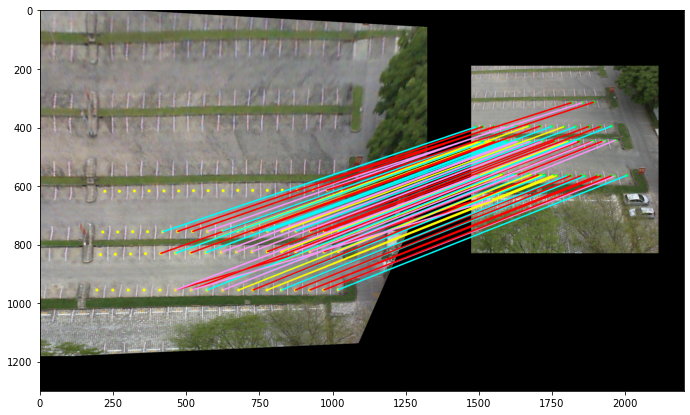

In [328]:
newPic = np.zeros((1300, 2200 ,3), dtype='int')
newPic[0:_master.shape[0], 0:_master.shape[1], :] = _master
offset_x = int(_master.shape[0] / 2 - 400)
offset_y = _master.shape[1] + 150

sub_0 = cv2.imread("pre_detection_0.jpg", cv2.IMREAD_ANYCOLOR)
sub_0 = cv2.cvtColor(sub_0, cv2.COLOR_BGR2RGB)
centroids_0_pre =  np.array(pd.read_csv('image_centroids_0.csv'), dtype='int')[:, 1:3]
for i in range(0, centroids_0_pre.shape[0]):
    tup = (centroids_0_pre[i, 1], centroids_0_pre[i, 0])
    cv2.circle(sub_0,(centroids_0_pre[i, 0], centroids_0_pre[i, 1]), 5, (0,255,0), -1)
print(sub_0.shape[0])

newPic[offset_x:(offset_x+sub_0.shape[0]), offset_y:(offset_y+sub_0.shape[1]), :] = sub_0



col1 = (250, 150, 250)
col2 = (0, 255, 255)
col3 = (255, 255, 0)
col4 = (255, 0, 0)

#plt.imshow(newPic)

centroids_0_post = TransformCentroidPoints(centroids_0_pre, H_0)
centroids_ground_truth =  np.array(pd.read_csv('master_ground_truth_centroids.csv'), dtype='int')
for i in range(0, centroids_0_pre.shape[0]):
    pt = centroids_0_pre[i, :]
    hom_pt = Transform2DPoint(pt, H_0) # <-- Is a 2d point
    
    smallest_norm = 10000
    smallest_index = 0
    for j in range(0, centroids_ground_truth.shape[0]):
        norm = np.linalg.norm(hom_pt - centroids_ground_truth[j, :], ord=2)
        if norm < smallest_norm:
            smallest_norm = norm
            smallest_index = j

    col = col1 if i % 4 == 0 else (col2 if i%3 == 0 else (col3 if i%2 ==0 else (col4)))
    cv2.line(
        newPic, 
        (centroids_0_pre[i,0] + offset_y, centroids_0_pre[i,1] + offset_x),
        (centroids_ground_truth[smallest_index, 0], centroids_ground_truth[smallest_index, 1]), 
        col, 
        thickness=3)

#fx, plots = plt.subplots(1, 2, figsize=(20,10))

#plots[0].set_title("Master Grid w/ ground truth centroids (yellow)")
#plots[0].imshow(_master)

#plots[1].set_title("Sampled segment w/ YOLO-computed centroids")
#plots[1].imshow(newPic)
    

plt.imshow(newPic)

640


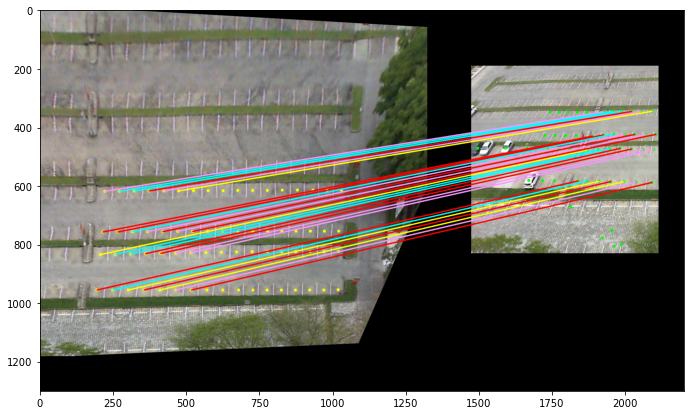

In [278]:
newPic = np.zeros((1300, 2200 ,3), dtype='int')
newPic[0:_master.shape[0], 0:_master.shape[1], :] = _master
offset_x = int(_master.shape[0] / 2 - 400)
offset_y = _master.shape[1] + 150

sub_2 = cv2.imread("pre_detection_2.jpg", cv2.IMREAD_ANYCOLOR)
sub_2 = cv2.cvtColor(sub_2, cv2.COLOR_BGR2RGB)
centroids_2_pre =  np.array(pd.read_csv('image_centroids_2.csv').iloc[:, 1:3], dtype='int')
for i in range(0, centroids_2_pre.shape[0]):
    tup = (centroids_2_pre[i, 1], centroids_2_pre[i, 0])
    cv2.circle(sub_2,(centroids_2_pre[i, 0], centroids_2_pre[i, 1]), 5, (0,255,0), -1)
print(sub_2.shape[0])

newPic[offset_x:(offset_x+sub_2.shape[0]), offset_y:(offset_y+sub_2.shape[1]), :] = sub_2


col1 = (250, 150, 250)
col2 = (0, 255, 255)
col3 = (255, 255, 0)
col4 = (255, 0, 0)

plt.imshow(newPic)

centroids_2_post = TransformCentroidPoints(centroids_2_pre, H_2)
centroids_ground_truth =  np.array(pd.read_csv('master_ground_truth_centroids.csv'), dtype='int')
for i in range(0, centroids_2_pre.shape[0]):
  #  if i % 4 != 0 : continue
    pt = centroids_2_pre[i, :]
    hom_pt = Transform2DPoint(pt, H_2) # <-- Is a 2d point
    
    smallest_norm = 10000
    smallest_index = -1
    for j in range(0, centroids_ground_truth.shape[0]):
        norm = np.linalg.norm(hom_pt - centroids_ground_truth[j, :], ord=2)
        if norm < smallest_norm and norm < 50:
            smallest_norm = norm
            smallest_index = j

    # Filters out any matches that are not less than a certain threshold
    if (smallest_index != -1):
        col = col1 if i % 4 == 0 else (col2 if i%3 == 0 else (col3 if i%2 ==0 else (col4)))
        cv2.line(
            newPic, 
            (centroids_2_pre[i,0] + offset_y, centroids_2_pre[i,1] + offset_x),
            (centroids_ground_truth[smallest_index, 0], centroids_ground_truth[smallest_index, 1]), 
            col, 
            thickness=4)

plt.imshow(newPic)